<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; max-width: 400px; display: flex; justify-content: center;">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" style="max-width: 50%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style="color: #08306B;">ML Project |</span> <span style="color: #08529C;">To Grant or Not to Grant</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>João Henriques, 20240499</div>
            <div>Simone Genovese, 20241459</div>
            <div>Steven Carlson, 20240554</div>
            <div>Vinícius Pinto, 20211682</div>
            <div>Zofia Wojcik, 20240654</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            TBL Group 33
        </div>
    </div>
</div>

## 📚 Libraries Import


In [95]:
# For data
import pandas as pd
import numpy as np
import os

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import missingno as msno

# For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

# Filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# embedded methods
from sklearn.linear_model import LassoCV, RidgeCV


# Set the style of the visualization
pd.set_option('display.max_columns', None) # display all columns

# Disable FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set_theme(style="white")

## 🧮 Import Databases

In [8]:
# Importing the dataset
train_data = pd.read_parquet('data/1stNotebook/train_data_cleaned.parquet')
test_data = pd.read_parquet('data/1stNotebook/test_data_cleaned.parquet')

In [10]:
# Display the first 2 rows of each dataset
train_data.head(2) 

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,C-3 Date Binary,First Hearing Date Binary,Birth Year Clean,Age at Injury Clean,Weekly Wage Reported,IME-4 Reported,Carrier Type Bucket,WCIO Cause of Injury Bucket,WCIO Nature of Injury Bucket,WCIO Part of Body Bucket,Accident Date Year,Accident Date Month,Accident Date Day,Accident Date Weekday,Assembly Date Year,Assembly Date Month,Assembly Date Day,Assembly Date Weekday,C-2 Date Year,C-2 Date Month,C-2 Date Day,C-2 Date Weekday,C-3 Date Year,C-3 Date Month,C-3 Date Day,C-3 Date Weekday,First Hearing Date Year,First Hearing Date Month,First Hearing Date Day,First Hearing Date Weekday,Claim Injury Type
0,2019-12-30,31,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,ST. LAWRENCE,N,SYRACUSE,NaT,M,NaN,44.0,RETAIL TRADE,I,27,FROM LIQUID OR GREASE SPILLS,10,CONTUSION,62,BUTTOCKS,13662,1,1,1,1988.0,31.0,0,0,1A. PRIVATE,4 - Fall,1 - Specific,IV - Trunk,2019.0,12.0,30.0,0.0,2020,1,1,2,2019.0,12.0,31.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2. NON-COMP
1,2019-08-30,46,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,97,REPETITIVE MOTION,49,SPRAIN OR TEAR,38,SHOULDER(S),14569,4,0,0,1973.0,46.0,1,1,1A. PRIVATE,6 - Strain_data,1 - Specific,III - Upper Extremities,2019.0,8.0,30.0,4.0,2020,1,1,2,2020.0,1.0,1.0,2.0,2020.0,1.0,14.0,1.0,2020.0,2.0,21.0,4.0,4. TEMPORARY


In [12]:
test_data.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,C-3 Date Binary,First Hearing Date Binary,Birth Year Clean,Age at Injury Clean,Weekly Wage Reported,IME-4 Reported,Carrier Type Bucket,WCIO Cause of Injury Bucket,WCIO Nature of Injury Bucket,WCIO Part of Body Bucket,Accident Date Year,Accident Date Month,Accident Date Day,Accident Date Weekday,Assembly Date Year,Assembly Date Month,Assembly Date Day,Assembly Date Weekday,C-2 Date Year,C-2 Date Month,C-2 Date Day,C-2 Date Weekday,C-3 Date Year,C-3 Date Month,C-3 Date Day,C-3 Date Weekday,First Hearing Date Year,First Hearing Date Month,First Hearing Date Day,First Hearing Date Weekday
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaT,INDEMNITY INSURANCE CO OF,1A. PRIVATE,BRONX,N,NYC,NaT,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,31,"FALL, SLIP OR TRIP, NOC",10,CONTUSION,54,LOWER LEG,10466,1,1,1,2003.0,19.0,0,0,1A. PRIVATE,4 - Fall,1 - Specific,V - Lower Extremities,2022.0,12.0,24.0,5.0,2023,1,2,0,2023.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaT,A I U INSURANCE COMPANY,1A. PRIVATE,QUEENS,N,NYC,NaT,F,NaN,45.0,RETAIL TRADE,IV,75,FALLING OR FLYING OBJECT,10,CONTUSION,10,MULTIPLE HEAD INJURY,11691,1,1,1,2003.0,19.0,0,0,1A. PRIVATE,8 - Struck,1 - Specific,I - Head,2022.0,11.0,20.0,6.0,2023,1,2,0,2023.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <a class='anchor' id='2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#08529C, #08306B); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>2 | Data Preparation</b></h1></center>
</div>

<br><br>

### **🛠️ Drop Columns Unnecessary for the Model**

In [14]:
train_data[train_data.columns.sort_values()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574026 entries, 0 to 574025
Data columns (total 59 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      570337 non-null  datetime64[ns]
 1   Accident Date Day                  570337 non-null  float64       
 2   Accident Date Month                570337 non-null  float64       
 3   Accident Date Weekday              570337 non-null  float64       
 4   Accident Date Year                 570337 non-null  float64       
 5   Age at Injury                      574026 non-null  int64         
 6   Age at Injury Clean                571840 non-null  float64       
 7   Alternative Dispute Resolution     574026 non-null  object        
 8   Assembly Date                      574026 non-null  datetime64[ns]
 9   Assembly Date Day                  574026 non-null  int32         
 10  Assembly Date Month 

In [16]:
# Drop the Dates columns
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date'] # Because we have all extracted columns from it

# Drop the columns based on Correlation Analysis [1st Notebook]
columns_to_drop = ['Age at Injury',    # Because we have Age at Injury Cleaned
                   'Birth Year',       # Because we have Age at Injury Cleaned [It's redundant]
                   'Birth Year Clean', # Because we have Age at Injury Cleaned [It's redundant]
                   'Average Weekly Wage', # Because we create a new column from it ['Weekly Wage Reported']
                   'Carrier Name',     # Because we don't know how to treat text for now
                   'Carrier Type',     # Because we create a new column from it ['Carrier Type Bucket']
                   'IME-4 Count',      # Because we create a new column from it ['IME-4 Reported']
                   'Industry Code Description',  # Because we have 'Industry Code'
                   'Zip Code',          # Because we have 'Medical Fee Region' [It's redundant]
                   'WCIO Cause of Injury Description',  # Because we have 'WCIO Cause of Injury Bucket'
                   'WCIO Cause of Injury Code',         # Because we have 'WCIO Cause of Injury Bucket'
                   'WCIO Part Of Body Description',     # Because we have 'WCIO Part of Body Bucket'
                   'WCIO Part Of Body Code',            # Because we have 'WCIO Part of Body Bucket'
                   'WCIO Nature of Injury Description', # Because we have 'WCIO Nature of Injury Bucket'
                   'WCIO Nature of Injury Code',        # Because we have 'WCIO Nature of Injury Bucket'

                   # Dates columns that we don't need
                   'C-3 Date Year', 'C-3 Date Month', 'C-3 Date Day', 'C-3 Date Weekday',
                   'First Hearing Date Year', 'First Hearing Date Month', 'First Hearing Date Day', 'First Hearing Date Weekday'
]

train_data = train_data.drop(columns = date_columns + columns_to_drop)
test_data = test_data.drop(columns = date_columns + columns_to_drop)

In [18]:
# Show the columns of the training set (train_data) that have missing values and are 'object' type
train_data.select_dtypes(include = 'object').columns[train_data.select_dtypes(include = 'object').isnull().any()]

Index([], dtype='object')

> Since our approach to the **`NA's`** of categorical variables is to replace them with a new category, it is confirmed that no variable currently has **`NA's`**.

In [20]:
# Show the columns of the training set 'object' type
train_data.select_dtypes(include = 'object').columns

Index(['Alternative Dispute Resolution', 'Attorney/Representative',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Medical Fee Region', 'Carrier Type Bucket',
       'WCIO Cause of Injury Bucket', 'WCIO Nature of Injury Bucket',
       'WCIO Part of Body Bucket', 'Claim Injury Type'],
      dtype='object')

> For **`object`** type variables, we will use some **Enconding** techniques to transform them into **numerical** variables, since the model does not accept **`object`** type variables.

---

### ⚖️ **Training/Validation Division**

> Before starting the feature engineering process that will be carried out in the next steps, we will divide the training data into training and validation sets. This will allow us to evaluate the performance of the models we will develop.

In [22]:
# Splitting the data into training and validation sets
X = train_data.drop(columns = ['Claim Injury Type'])
y = train_data['Claim Injury Type']
X_train, X_val, y_train, y_val = train_test_split(X,y,                 # X and y
                                                  test_size = 0.25,    # 75% train, 25% validation
                                                  random_state = 2024, # Seed
                                                  stratify = y,        # Keep the same proportion of target classes (because of imbalance)
                                                  shuffle = True)      # Shuffle the data

In [24]:
# Check the shape of the training and validation sets
X_train.shape, X_val.shape

((430519, 30), (143507, 30))

In [26]:
# Check the columns of the training set (X_train) that are not in the validation set (X_val)
set(X_train.columns) - set(X_val.columns) # Perfect!

set()

In [28]:
# Check the information of the training set
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430519 entries, 522354 to 179683
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Alternative Dispute Resolution  430519 non-null  object 
 1   Attorney/Representative         430519 non-null  object 
 2   County of Injury                430519 non-null  object 
 3   COVID-19 Indicator              430519 non-null  object 
 4   District Name                   430519 non-null  object 
 5   Gender                          430519 non-null  object 
 6   Industry Code                   423065 non-null  float64
 7   Medical Fee Region              430519 non-null  object 
 8   Number of Dependents            430519 non-null  int64  
 9   C-3 Date Binary                 430519 non-null  int32  
 10  First Hearing Date Binary       430519 non-null  int32  
 11  Age at Injury Clean             428886 non-null  float64
 12  Weekly Wage Repo

In [30]:
# Show the columns of the training set (X_train) that have missing values
X_train.columns[X_train.isnull().any()]

Index(['Industry Code', 'Age at Injury Clean', 'Accident Date Year',
       'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday',
       'C-2 Date Year', 'C-2 Date Month', 'C-2 Date Day', 'C-2 Date Weekday'],
      dtype='object')

> Since we have missing values in the dataset, we will need to use some technique to fill in on next steps.

---

### <a class='anchor' id='DP_FeatureEng'></a> 🛠️ **Feature Engineering**

##### **Most Used Feature Engineering Techniques**

+ **Binning / Bucketizing** ✅    
  - Grouping of values into "bins" or "buckets"
  
<br>

1. **Splitting the Data** ✅
    - Training Data
    - Validation Data

2. **Handling Missing Values**
    - Drop Missing Values
    - Impute Missing Values (e.g., using some statistical measure, KNN, etc.)

3. **Encoding**
    - Label Encoding using Scikit-learn
    - One-Hot Encoding using Scikit-learn

4. **Multicollinearity**
    - Variance Inflation Factor (VIF)
  
5. **Normalize / Standardize** <sup>*</sup> [We will do it on the next notebook] - [3. Modeling&Evaluation]('./3_Modeling&Evaluation_MLProject_Group33.ipynb')
    - Normalize and Standardize using Scikit-learn

<br>

<sup><b>*</b></sup>
**Note:** We will **Normalize / Standardize** the data in the next notebook, since that will create more datasets to work with. It is better to do it after the **Feature Engineering** process.



---

#### **2 | Handling Missing Values**

**`Industry Code`**
   - **Chosen Strategy**: Replace with **NaN** (new category)
   - **Reasoning**: For categorical variables like "Industry Code," we decided to replace missing values with a new category (NaN). This approach allows the model to learn from the absence of data, which can be informative in itself. This approach avoids losing information and is simple to implement.
  
**`Accident Date Day, Month, Weekday, Year`**
   - **Chosen Strategy**: **Median Imputation**
   - **Reasoning**: Each of these variables has a low percentage of missing values ($\approx0.63\%$), so using the median for imputation is both simple and effective. Median imputation is robust to outliers and provides a reasonable estimate without adding complexity.
  
**`C-2 Date Day, Month, Weekday, Year`**
   - **Chosen Strategy**: **KNN Imputation**
   - **Reasoning**: Given the higher missingness (around 2.5% across all splits), using a more sophisticated method like **KNN Imputer** is advisable. KNN can leverage similar samples in the dataset to make more accurate estimations for these missing values. This is particularly helpful for dates, as related date components (day, month, year, weekday) could have patterns that KNN captures well.
  
**`Age at Injury Clean`**
   - **Chosen Strategy**: **Mean or Median Imputation**
   - **Reasoning**: "Age at Injury Clean" has moderate missingness in the train and validation sets (around 0.38-0.39%) but shows a larger gap in the test set (0.25%). Since age is likely normally distributed, either the mean or median could work well. **Median** is preferred if the data has a skew or if there are outliers, but **mean imputation** is a reasonable choice if the distribution is more balanced.

---

In [32]:
# Check how many missing values are left in both training and validation sets
NAs_df = pd.DataFrame({
    'n train': X_train.isnull().sum(),
    '% train': round(X_train.isnull().mean()*100, 2),
    'n val': X_val.isnull().sum(),
    '% val': round(X_val.isnull().mean()*100, 2),
    'n test': test_data.isnull().sum(),
    '% test': round(test_data.isnull().mean()*100, 2)
})
NAs_df[NAs_df['% train'] > 0].sort_index(ascending = True)

,n train,% train,n val,% val,n test,% test
Accident Date Day,2712,0.63,977,0.68,2444,0.63
Accident Date Month,2712,0.63,977,0.68,2444,0.63
Accident Date Weekday,2712,0.63,977,0.68,2444,0.63
Accident Date Year,2712,0.63,977,0.68,2444,0.63
Age at Injury Clean,1633,0.38,553,0.39,982,0.25
C-2 Date Day,10903,2.53,3657,2.55,9134,2.35
C-2 Date Month,10903,2.53,3657,2.55,9134,2.35
C-2 Date Weekday,10903,2.53,3657,2.55,9134,2.35
C-2 Date Year,10903,2.53,3657,2.55,9134,2.35
Industry Code,7454,1.73,2504,1.74,7736,1.99


In [34]:
# Check the columns of the training set (X_train) that have missing values
X_train.columns[X_train.isnull().sum()>0]

Index(['Industry Code', 'Age at Injury Clean', 'Accident Date Year',
       'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday',
       'C-2 Date Year', 'C-2 Date Month', 'C-2 Date Day', 'C-2 Date Weekday'],
      dtype='object')

> Since **`Industry Code`** are categorical variables, we will replace the **`NA's`** with a new category **`0` $\rightarrow$ Unknown**.

In [36]:
# Fill the missing values of 'Industry Code' with '0'
X_train['Industry Code'] = X_train['Industry Code'].fillna(0)
X_val['Industry Code'] = X_val['Industry Code'].fillna(0)
test_data['Industry Code'] = test_data['Industry Code'].fillna(0)

# Check the columns of the training set (X_train) that have missing values
X_train.columns[X_train.isnull().sum()>0]

Index(['Age at Injury Clean', 'Accident Date Year', 'Accident Date Month',
       'Accident Date Day', 'Accident Date Weekday', 'C-2 Date Year',
       'C-2 Date Month', 'C-2 Date Day', 'C-2 Date Weekday'],
      dtype='object')

---

> Since **`Accident Date`** have low number of **`NA's`** and it is a **`datetime`** type variable, we will replace the **`NA's`** with the **`median`** of the variable, because that metric is more robust to outliers.

- Given the small number of outliers, using a more complex imputation method like **K-Nearest Neighbors (KNN)** is not efficient or necessary in this case. The median provides a robust, straightforward approach that avoids overcomplicating the imputation for a minimal number of missing values.

In [38]:
# Check descriptive statistics of the 'Accident Date Year', 'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday' and 'Age of Injury Clean' columns
X_train[['Accident Date Year', 'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday', 'Age at Injury Clean']].describe().T

,count,mean,std,min,25%,50%,75%,max
Accident Date Year,427807.0,2020.826826,1.863070,1961.0,2020.0,2021.0,2022.0,2023.0
Accident Date Month,427807.0,6.492689,3.467180,1.0,3.0,7.0,9.0,12.0
Accident Date Day,427807.0,15.526653,8.777784,1.0,8.0,15.0,23.0,31.0
Accident Date Weekday,427807.0,2.501574,1.813639,0.0,1.0,2.0,4.0,6.0
Age at Injury Clean,428886.0,42.585032,13.746412,1.0,31.0,42.0,54.0,122.0


> In the case of **`Accident Date Day, Month, Weekday, Year`** and **`Age at Injury Clean`**, have approximately same **mean** and **median**.

In [40]:
######################### First Approach: Filling with Central Tendency Measures #########################
# Impute missing values of Dates columns with the 'median' strategy
for col in ['Accident Date Year', 'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday', 
            'Age at Injury Clean']:
    
    # Median value for each column in the training, validation and test data
    median_value_X_train = X_train[col].median()
    median_value_X_val = X_val[col].median()
    median_value_test_data = test_data[col].median()
    
    # Fill missing values
    X_train[col].fillna(median_value_X_train, inplace = True)
    X_val[col].fillna(median_value_X_val, inplace = True)
    test_data[col].fillna(median_value_test_data, inplace = True)

##############################################################################################################

##### **KNN Imputer <sup>[[1]](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)</sup>**

- **KNN Imputer** is a more sophisticated imputation method that leverages the similarity between samples to estimate missing values. It is particularly useful for continuous variables with complex relationships that can be captured by the nearest neighbors.
- This aproach is a good choice for the **`C-2 Date`** variables, which have a higher percentage of missing values (around 2.5% across all splits). The KNN algorithm can leverage the relationships between samples to make more accurate estimations for these missing values.

In [42]:
# Fill the rest of columns with missing values with the KNNImputer

# Copy the data
X_train_knn_imputed = X_train.copy(deep=True)                             # deep=True to avoid the SettingWithCopyWarning
X_train_knn_imputed_n = X_train_knn_imputed.select_dtypes(include="number")    # Select numerical columns

# Init the transformer
knn_imp = KNNImputer()                                               # k=5 is the default 

# Fit/transform
X_train_knn_imputed_n.loc[:, :] = knn_imp.fit_transform(X_train_knn_imputed_n)

In [43]:
# Check the columns of the training set (X_train) that have missing values
X_train_knn_imputed_n[X_train_knn_imputed_n.columns[X_train_knn_imputed_n.isnull().any()]]

""
522354
106294
239178
276985
548104
...
163734
447809
197034
261663


In [44]:
# Now do the same for the validation and test data
X_val_knn_imputed = X_val.copy(deep=True)
X_val_knn_imputed_n = X_val_knn_imputed.select_dtypes(include="number")
X_val_knn_imputed_n.loc[:, :] = knn_imp.transform(X_val_knn_imputed_n)

test_data_knn_imputed = test_data.copy(deep=True)
test_data_knn_imputed_n = test_data_knn_imputed.select_dtypes(include="number")
test_data_knn_imputed_n.loc[:, :] = knn_imp.transform(test_data_knn_imputed_n)

#### TimeExecution: 9 min 53 sec

In [45]:
# Replace the columns that have missing values with the KNNImputer values
X_train[X_train.select_dtypes(include="number").columns] = X_train_knn_imputed_n
X_val[X_val.select_dtypes(include="number").columns] = X_val_knn_imputed_n
test_data[test_data.select_dtypes(include="number").columns] = test_data_knn_imputed_n

---

#### **3 | Encoding**

- Feature encoding is a process used to transform categorical data into numerical values that can be understood by ML algorithms. 
- There are several types of encoding, including label encoding and one-hot encoding.

<br><br>

<div style="max-width:750px; display: block; margin: 0 auto;">

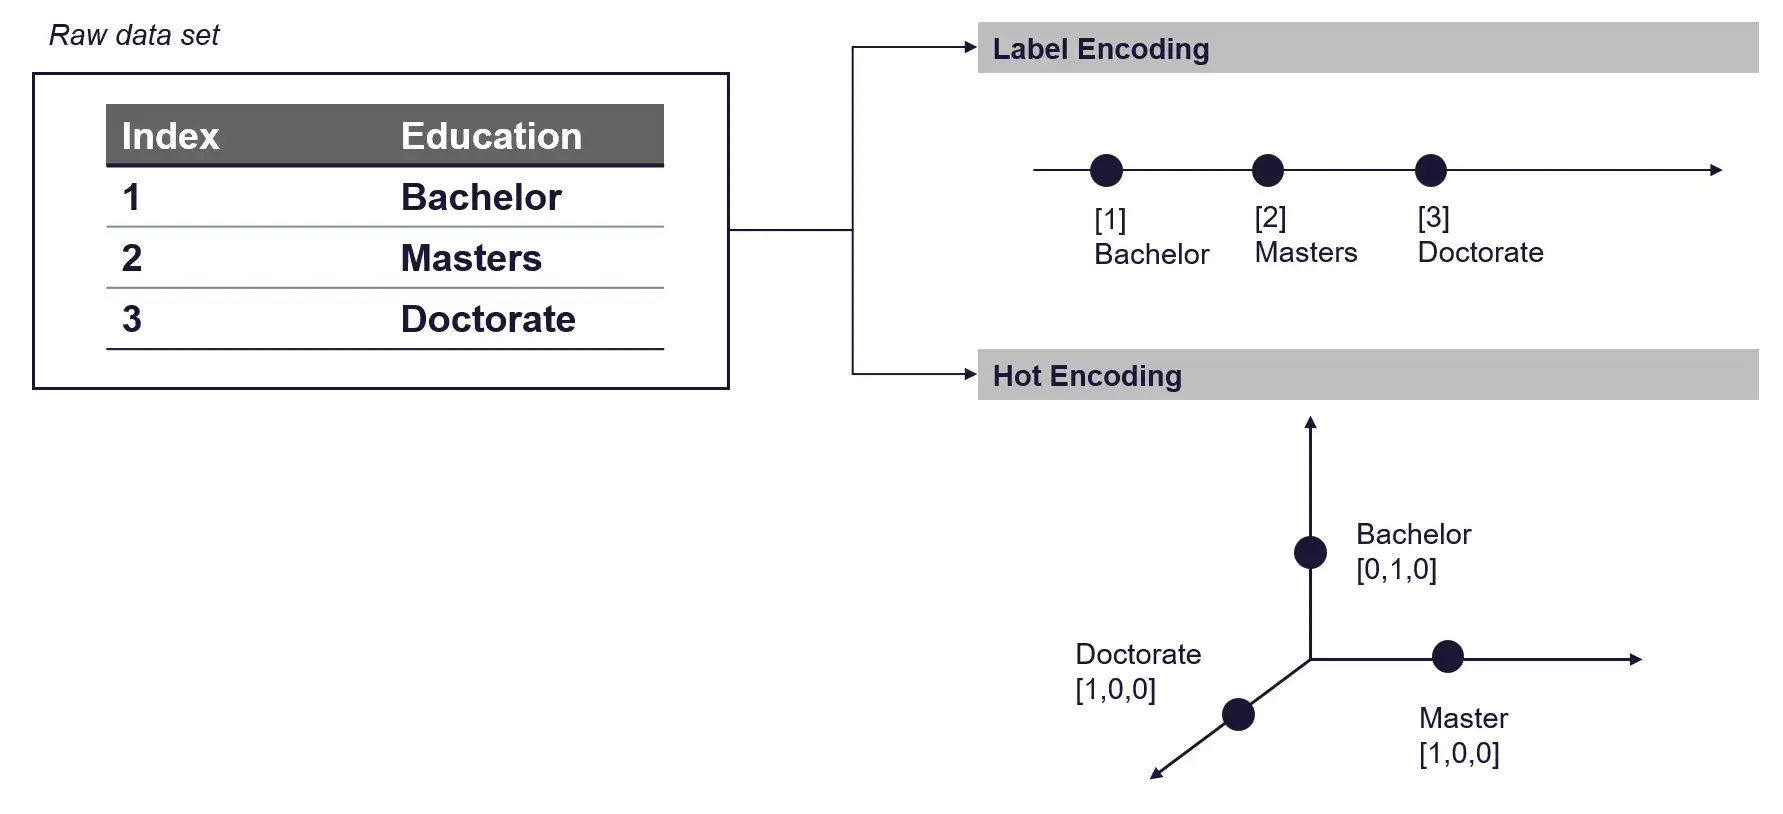
    
</div>


---

##### **Label/Ordinal Encoding**

- **Label/Ordinal encoding** involves assigning a numeric value to each categorical value. 
- Can be effective if exists an inherent order to the categorical values, which can be encoded as numeric values from $1$ to $k$. 
- This way of encoding can cause problems for some algorithms because the assigned integers do not necessarily reflect any inherent order or relationship between the categories. 
- Alternatively, you can use **One-hot encoding** to transform categorical values into numerical values.

<br>

##### **One-Hot Encoding**

- In **One-hot encoding**, the column of categorical values is split into several new columns, one for each unique categorical value.
- Alternatively, you can use **One-hot encoding** to transform categorical values into numerical values. 
- In **one-hot encoding**, we represent a categorical variable as a group of binary variables, where each binary variable represents one category. 
- The binary variable indicates whether the category is present in an observation ($1$) or not ($0$). 
- A categorical variable with $n$ unique categories can be encoded in $(n-1)$ binary variables.
- This results in a *sparse matrix*, where most of the values are $0$.
- The disadvantage of one-hot encoding is that it can significantly increase the size of the dataset, which can be a problem if the column you want to encode contains hundreds or thousands of unique categorical values.
- I.e., the problem with one-hot encoding is that it can lead to large and sparse datasets with high dimensionality.

In [50]:
# Mapping the target variable 'Claim Injury Type' to numerical values
claim_injury_type_dict = {"1. CANCELLED": 1, "2. NON-COMP": 2, 
                          "3. MED ONLY": 3, "4. TEMPORARY": 4, 
                          "5. PPD SCH LOSS": 5, "6. PPD NSL": 6, 
                          "7. PTD": 7, "8. DEATH": 8}

# Encode the target variable
y_train_encoded = y_train.map(claim_injury_type_dict)
y_val_encoded = y_val.map(claim_injury_type_dict)

# Check the first 5 values of the encoded target variable [Compare with the original target variable]
pd.DataFrame({'Original': y_train, 'Encoded': y_train_encoded})

,Original,Encoded
522354,2. NON-COMP,2
106294,4. TEMPORARY,4
239178,2. NON-COMP,2
276985,4. TEMPORARY,4
548104,2. NON-COMP,2
...,...,...
163734,2. NON-COMP,2
447809,4. TEMPORARY,4
197034,4. TEMPORARY,4
261663,3. MED ONLY,3


In [52]:
# Replace the target variable 'Claim Injury Type' with the encoded values, after confirming the correctness of the encoding
y_train = y_train_encoded
y_val = y_val_encoded

In [54]:
# Check the 'object' columns of the training set (X_train)
X_train.select_dtypes(include = 'object').columns

Index(['Alternative Dispute Resolution', 'Attorney/Representative',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Medical Fee Region', 'Carrier Type Bucket',
       'WCIO Cause of Injury Bucket', 'WCIO Nature of Injury Bucket',
       'WCIO Part of Body Bucket'],
      dtype='object')

In [72]:
## for more details check:
# ?OrdinalEncoder

In [56]:
################### First Approach: Label Encoding ###################
# Label/Ordinal Encoding

# Create a new dataframe to store the encoded columns
X_train_ordinal_encoded = X_train.copy()
X_val_ordinal_encoded = X_val.copy()
test_data_ordinal_encoded = test_data.copy()

# Ensure that the categorical columns are 'object' type (Make 'category' type if they are not)
X_train_ordinal_encoded = X_train_ordinal_encoded.astype({col: 'object' for col in X_train.select_dtypes(include='category').columns})
X_val_ordinal_encoded = X_val_ordinal_encoded.astype({col: 'object' for col in X_val.select_dtypes(include='category').columns})
test_data_ordinal_encoded = test_data_ordinal_encoded.astype({col: 'object' for col in test_data.select_dtypes(include='category').columns})

# Initialize the OrdinalEncoder (Coder for categorical features)
ordinal_encoder = OrdinalEncoder()   # The number of categories is based on alphabetical order

# Fit the ordinal_encoder on all data (Avoid that some categories are not present in the training data)
ordinal_encoder.fit(pd.concat([X_train_ordinal_encoded, X_val_ordinal_encoded, test_data_ordinal_encoded], axis = 0))

# Transform the training data [All categorical columns will be transformed into numerical values]
    
# Transform the training data and save it in the same dataframe
X_train_ordinal_encoded = pd.DataFrame(ordinal_encoder.transform(X_train_ordinal_encoded), columns = X_train_ordinal_encoded.columns)

# Transform the validation data -> I just 'transform' it because the ordinal_encoder is already fitted on the training data
X_val_ordinal_encoded = pd.DataFrame(ordinal_encoder.transform(X_val_ordinal_encoded), columns = X_val_ordinal_encoded.columns)

# Transform the test data
test_data_ordinal_encoded = pd.DataFrame(ordinal_encoder.transform(test_data_ordinal_encoded), columns = test_data_ordinal_encoded.columns)
    
######################################################################

In [68]:
# Check the label encoded columns
X_train_ordinal_encoded

,Alternative Dispute Resolution,Attorney/Representative,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,Medical Fee Region,Number of Dependents,C-3 Date Binary,First Hearing Date Binary,Age at Injury Clean,Weekly Wage Reported,IME-4 Reported,Carrier Type Bucket,WCIO Cause of Injury Bucket,WCIO Nature of Injury Bucket,WCIO Part of Body Bucket,Accident Date Year,Accident Date Month,Accident Date Day,Accident Date Weekday,Assembly Date Year,Assembly Date Month,Assembly Date Day,Assembly Date Weekday,C-2 Date Year,C-2 Date Month,C-2 Date Day,C-2 Date Weekday
0,0.0,0.0,6.0,0.0,2.0,0.0,18.0,0.0,6.0,1.0,1.0,43.0,0.0,0.0,1.0,5.0,1.0,5.0,57.0,8.0,21.0,3.0,2.0,8.0,26.0,1.0,100.0,40.0,130.0,5.0
1,0.0,1.0,23.0,0.0,4.0,0.0,20.0,3.0,3.0,0.0,0.0,48.0,1.0,1.0,1.0,9.0,1.0,2.0,55.0,7.0,4.0,2.0,0.0,7.0,12.0,3.0,90.0,35.0,80.0,0.0
2,0.0,0.0,42.0,0.0,4.0,0.0,20.0,3.0,4.0,1.0,1.0,59.0,0.0,0.0,2.0,7.0,1.0,4.0,56.0,4.0,2.0,0.0,1.0,4.0,4.0,2.0,95.0,20.0,20.0,10.0
3,0.0,1.0,29.0,0.0,4.0,0.0,24.0,3.0,3.0,0.0,0.0,67.0,1.0,1.0,3.0,7.0,1.0,6.0,56.0,6.0,6.0,2.0,1.0,6.0,12.0,1.0,95.0,30.0,55.0,0.0
4,0.0,0.0,23.0,0.0,4.0,1.0,9.0,3.0,3.0,1.0,1.0,24.0,0.0,0.0,1.0,9.0,1.0,5.0,57.0,10.0,7.0,1.0,2.0,10.0,9.0,3.0,100.0,50.0,40.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430514,0.0,0.0,41.0,0.0,0.0,1.0,5.0,1.0,3.0,1.0,1.0,38.0,0.0,0.0,2.0,2.0,1.0,3.0,55.0,10.0,29.0,0.0,0.0,11.0,8.0,2.0,90.0,55.0,40.0,10.0
430515,0.0,0.0,51.0,0.0,3.0,1.0,24.0,3.0,0.0,1.0,1.0,64.0,1.0,0.0,3.0,9.0,1.0,6.0,57.0,4.0,11.0,3.0,2.0,4.0,18.0,3.0,100.0,20.0,90.0,15.0
430516,0.0,0.0,60.0,0.0,4.0,0.0,20.0,2.0,5.0,0.0,0.0,47.0,1.0,1.0,1.0,5.0,1.0,3.0,56.0,1.0,10.0,3.0,1.0,1.0,14.0,0.0,95.0,5.0,70.0,0.0
430517,0.0,0.0,51.0,0.0,3.0,0.0,10.0,2.0,1.0,1.0,1.0,35.0,0.0,0.0,2.0,4.0,1.0,1.0,56.0,5.0,4.0,5.0,1.0,5.0,14.0,1.0,95.0,25.0,70.0,5.0


In [70]:
## for more details check:
# ?OneHotEncoder

In [58]:
################### Second Approach: One-Hot Encoding ###################
# One-Hot Encoding

# Create a new dataframe for the One-Hot Encoding
X_train_ohe = X_train.copy()
X_val_ohe = X_val.copy()
test_data_ohe = test_data.copy()

# Ensure that the categorical columns are 'object' type (Make 'category' type if they are not)
X_train_ohe = X_train_ohe.astype({col: 'object' for col in X_train.select_dtypes(include='category').columns})
X_val_ohe = X_val_ohe.astype({col: 'object' for col in X_val.select_dtypes(include='category').columns})
test_data_ohe = test_data_ohe.astype({col: 'object' for col in test_data.select_dtypes(include='category').columns})

# Function to change the name of the columns 
# Source: https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html
def custom_combiner(feature, category):
    return str(feature) + "_" + str(category)

# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder(feature_name_combiner=custom_combiner,       # Custom function to change the name of the columns
                                handle_unknown="ignore",                     # Ignore unknown categories
                                sparse_output=False,                         # sparse=False to return a numpy array
                                drop="first")                                # drop='first' to fix the dummy variable trap (n-1)

# Fit and transform the training data [All categorical columns will be transformed into numerical values]
X_train_ohe_values = one_hot_encoder.fit_transform(X_train_ohe[X_train.select_dtypes(include='object').columns])
X_train_ohe_values_df = pd.DataFrame(X_train_ohe_values, columns = one_hot_encoder.get_feature_names_out(X_train.select_dtypes(include='object').columns))
X_train_ohe = pd.concat([X_train_ohe.drop(columns = X_train_ohe.select_dtypes(include='object').columns), X_train_ohe_values_df], axis = 1)

# Fit and Transform the validation data
X_val_ohe_values = one_hot_encoder.fit_transform(X_val_ohe[X_val.select_dtypes(include='object').columns])
X_val_ohe_values_df = pd.DataFrame(X_val_ohe_values, columns = one_hot_encoder.get_feature_names_out(X_val.select_dtypes(include='object').columns))
X_val_ohe = pd.concat([X_val_ohe.drop(columns = X_val_ohe.select_dtypes(include='object').columns), X_val_ohe_values_df], axis = 1)

#  Fit and Transform the test data
test_data_ohe_values = one_hot_encoder.fit_transform(test_data_ohe[test_data.select_dtypes(include='object').columns])
test_data_ohe_values_df = pd.DataFrame(test_data_ohe_values, columns = one_hot_encoder.get_feature_names_out(test_data.select_dtypes(include='object').columns))
test_data_ohe = pd.concat([test_data_ohe.drop(columns = test_data_ohe.select_dtypes(include='object').columns), test_data_ohe_values_df], axis = 1)

In [59]:
# Check the One-Hot encoded columns
X_train_ohe.head(2)

,Industry Code,Number of Dependents,C-3 Date Binary,First Hearing Date Binary,Age at Injury Clean,Weekly Wage Reported,IME-4 Reported,Accident Date Year,Accident Date Month,Accident Date Day,Accident Date Weekday,Assembly Date Year,Assembly Date Month,Assembly Date Day,Assembly Date Weekday,C-2 Date Year,C-2 Date Month,C-2 Date Day,C-2 Date Weekday,Alternative Dispute Resolution_U,Alternative Dispute Resolution_Y,Attorney/Representative_Y,County of Injury_ALLEGANY,County of Injury_BRONX,County of Injury_BROOME,County of Injury_CATTARAUGUS,County of Injury_CAYUGA,County of Injury_CHAUTAUQUA,County of Injury_CHEMUNG,County of Injury_CHENANGO,County of Injury_CLINTON,County of Injury_COLUMBIA,County of Injury_CORTLAND,County of Injury_DELAWARE,County of Injury_DUTCHESS,County of Injury_ERIE,County of Injury_ESSEX,County of Injury_FRANKLIN,County of Injury_FULTON,County of Injury_GENESEE,County of Injury_GREENE,County of Injury_HAMILTON,County of Injury_HERKIMER,County of Injury_JEFFERSON,County of Injury_KINGS,County of Injury_LEWIS,County of Injury_LIVINGSTON,County of Injury_MADISON,County of Injury_MONROE,County of Injury_MONTGOMERY,County of Injury_NASSAU,County of Injury_NEW YORK,County of Injury_NIAGARA,County of Injury_ONEIDA,County of Injury_ONONDAGA,County of Injury_ONTARIO,County of Injury_ORANGE,County of Injury_ORLEANS,County of Injury_OSWEGO,County of Injury_OTSEGO,County of Injury_PUTNAM,County of Injury_QUEENS,County of Injury_RENSSELAER,County of Injury_RICHMOND,County of Injury_ROCKLAND,County of Injury_SARATOGA,County of Injury_SCHENECTADY,County of Injury_SCHOHARIE,County of Injury_SCHUYLER,County of Injury_SENECA,County of Injury_ST. LAWRENCE,County of Injury_STEUBEN,County of Injury_SUFFOLK,County of Injury_SULLIVAN,County of Injury_TIOGA,County of Injury_TOMPKINS,County of Injury_ULSTER,County of Injury_UNKNOWN,County of Injury_WARREN,County of Injury_WASHINGTON,County of Injury_WAYNE,County of Injury_WESTCHESTER,County of Injury_WYOMING,County of Injury_YATES,COVID-19 Indicator_Y,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,District Name_SYRACUSE,Gender_M,Gender_U,Gender_X,Medical Fee Region_II,Medical Fee Region_III,Medical Fee Region_IV,Medical Fee Region_UK,Carrier Type Bucket_1A. PRIVATE,Carrier Type Bucket_2A. SIF,Carrier Type Bucket_3A. SELF PUBLIC,Carrier Type Bucket_4A. SELF PRIVATE,Carrier Type Bucket_5A-5C. SPECIAL FUND,WCIO Cause of Injury Bucket_1 - Temp,WCIO Cause of Injury Bucket_10 - Miscellaneous,WCIO Cause of Injury Bucket_2 - Caught,WCIO Cause of Injury Bucket_3 - Cut,WCIO Cause of Injury Bucket_4 - Fall,WCIO Cause of Injury Bucket_5 - Motor Vehicle,WCIO Cause of Injury Bucket_6 - Strain_data,WCIO Cause of Injury Bucket_7 - Striking,WCIO Cause of Injury Bucket_8 - Struck,WCIO Cause of Injury Bucket_9 - Rubbed,WCIO Nature of Injury Bucket_1 - Specific,WCIO Nature of Injury Bucket_2 - Occupational/Cumulative,WCIO Nature of Injury Bucket_3 - Multiple,WCIO Part of Body Bucket_I - Head,WCIO Part of Body Bucket_II - Neck,WCIO Part of Body Bucket_III - Upper Extremities,WCIO Part of Body Bucket_IV - Trunk,WCIO Part of Body Bucket_V - Lower Extremities,WCIO Part of Body Bucket_VI - Multiple Body Parts
522354,56.0,6.0,1.0,1.0,47.0,0.0,0.0,2022.0,9.0,22.0,3.0,2022.0,9.0,27.0,1.0,2022.0,9.0,27.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106294,62.0,3.0,0.0,0.0,52.0,1.0,1.0,2020.0,8.0,5.0,2.0,2020.0,8.0,13.0,3.0,2020.0,8.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

---

#### **4 | Multicollinearity**


##### **Variance Inflation Factor (VIF)**

- **VIF** is a measure of multicollinearity among predictor variables within a multiple regression.
- **VIF** estimates how much the variance of a regression coefficient is increased due to multicollinearity in the model.

The formula for **VIF** is:

$$VIF = \frac{1}{1 - R^2}$$

Where $R^2$ is the coefficient of determination in a regression model where the predictor variable is regressed against all other predictor variables.

- **VIF** values are always greater than or equal to $1$.
- If **VIF** is equal to $1$, then there is no correlation among the predictor variables.
- If **VIF** is greater than $1$, then the predictors are correlated with other variables in the model.
- The general rule of thumb is that if **VIF** is greater than $10$, then multicollinearity is high and the predictors are highly correlated.
- In this case, the predictors should be removed from the model.
  

In [62]:
### use VIF to analise multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute the vif for all given features
def compute_vif(df, considered_features='all'):
    """
    :param df: DataFrame containing the features to compute VIF for.
    :param considered_features: List of features to consider for VIF calculation. If 'all', all features in the DataFrame will be considered.
    
    :return: DataFrame containing VIF values for the considered features.
    """
    # If no features are given, consider all features
    if considered_features == 'all':
        considered_features = df.columns
    
    # Create a new dataframe with the considered features
    X = df[considered_features]
    
    # Ensure all features are numeric
    for column in X.columns:
        X[column] = pd.to_numeric(X[column], errors='coerce')
    
    # The calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # Create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    
    vif = vif[vif['Variable']!='intercept']
    return vif

# Features to consider removing (VIF >5)
# In this case, we will consider 'X_train_ordinal_encoded' because in 'X_train_ohe' we have a lot of 'correlated columns'
compute_vif(X_train_ordinal_encoded).sort_values('VIF', ascending=False)

,Variable,VIF
23,Assembly Date Month,9.213836
27,C-2 Date Month,8.742143
28,C-2 Date Day,3.122111
24,Assembly Date Day,3.117430
26,C-2 Date Year,3.006854
1,Attorney/Representative,2.939303
22,Assembly Date Year,2.405810
13,IME-4 Reported,2.259030
10,First Hearing Date Binary,2.160968
19,Accident Date Month,1.975149


---

## **🎚️ Feature Selection** 

### **Filter Methods**

<div style="max-width:750px; display: block; margin: 0 auto;">
    <img src="https://machinelearningmastery.com/wp-content/uploads/2019/11/Overview-of-Feature-Selection-Techniques3.png">
</div>

<br>

- Correlation coefficient   ✅
- Chi-Square Test ✅ (with ETA Squared)

> On previous notebook, we have already done the **Filter Methods**, but we will do it again to check if the **Feature Engineering** process has changed the results.

##### **Correlation Coefficient**

In [65]:
# Spearman correlation matrix
cor_spearman = X_train_ordinal_encoded.corr(method='pearson')
cor_spearman = cor_spearman.round(2)
cor_spearman

,Alternative Dispute Resolution,Attorney/Representative,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,Medical Fee Region,Number of Dependents,C-3 Date Binary,First Hearing Date Binary,Age at Injury Clean,Weekly Wage Reported,IME-4 Reported,Carrier Type Bucket,WCIO Cause of Injury Bucket,WCIO Nature of Injury Bucket,WCIO Part of Body Bucket,Accident Date Year,Accident Date Month,Accident Date Day,Accident Date Weekday,Assembly Date Year,Assembly Date Month,Assembly Date Day,Assembly Date Weekday,C-2 Date Year,C-2 Date Month,C-2 Date Day,C-2 Date Weekday
Alternative Dispute Resolution,1.00,-0.03,0.02,-0.01,0.01,0.05,-0.14,0.05,-0.0,0.03,0.04,0.02,-0.05,-0.03,0.13,-0.15,-0.17,-0.16,-0.01,0.00,0.00,-0.02,-0.00,0.00,0.00,-0.00,0.01,0.01,0.00,-0.00
Attorney/Representative,-0.03,1.00,0.01,-0.04,0.05,0.08,-0.01,0.18,-0.0,-0.69,-0.66,0.13,0.52,0.66,0.07,0.03,0.01,0.09,-0.05,-0.01,0.00,0.00,-0.04,-0.00,-0.00,0.01,-0.02,-0.01,-0.00,0.02
County of Injury,0.02,0.01,1.00,0.03,0.09,0.01,-0.01,0.17,0.0,-0.01,0.00,0.03,0.01,-0.00,-0.01,-0.02,0.01,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.01,-0.00,-0.00,0.00,0.01,-0.00,-0.01
COVID-19 Indicator,-0.01,-0.04,0.03,1.00,-0.01,-0.02,0.08,0.06,-0.0,0.01,0.02,0.00,-0.06,-0.10,-0.00,-0.32,0.43,0.13,-0.02,-0.04,0.01,0.03,-0.06,-0.06,-0.00,0.00,-0.03,-0.05,-0.00,0.00
District Name,0.01,0.05,0.09,-0.01,1.00,-0.01,-0.01,0.22,0.0,-0.04,-0.03,0.00,0.02,0.03,0.02,-0.02,-0.00,-0.00,-0.01,-0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.01
Gender,0.05,0.08,0.01,-0.02,-0.01,1.00,-0.20,0.01,-0.0,-0.05,-0.04,-0.03,0.06,0.04,-0.02,-0.02,-0.03,-0.02,-0.03,0.01,0.01,-0.02,0.01,0.00,0.00,0.01,-0.00,0.00,0.00,0.01
Industry Code,-0.14,-0.01,-0.01,0.08,-0.01,-0.20,1.00,0.01,-0.0,0.01,0.03,0.01,0.02,-0.00,0.22,0.09,0.14,0.14,0.04,-0.02,0.00,0.04,-0.00,-0.02,-0.00,0.00,0.02,-0.02,0.00,0.00
Medical Fee Region,0.05,0.18,0.17,0.06,0.22,0.01,0.01,1.00,-0.0,-0.18,-0.14,0.02,0.06,0.12,-0.01,-0.04,0.02,0.04,-0.01,0.00,0.00,0.03,0.00,0.01,-0.00,0.00,0.02,0.00,-0.00,0.02
Number of Dependents,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,1.0,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00
C-3 Date Binary,0.03,-0.69,-0.01,0.01,-0.04,-0.05,0.01,-0.18,0.0,1.00,0.51,-0.11,-0.41,-0.49,-0.08,0.02,0.00,-0.06,0.01,0.01,-0.00,-0.00,0.05,0.01,0.01,-0.01,-0.00,0.02,0.00,-0.02


In [ ]:
# ---------------------- Spearman Correlation [Heatmap] ----------------------
# Show only high or low values: values above |0.3| will appear annotated in the plot
mask_annot = np.absolute(cor_spearman.values) >= 0.3
annot = np.where(mask_annot, cor_spearman.values, np.full(cor_spearman.shape,""))

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.zeros_like(cor_spearman, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# # Create a custom diverging palette from red (-1) to white (0) to green (1)
# cmap = sns.diverging_palette(10, 130, s=100, l=50, n=9, center='light', as_cmap=True)

# Plot the correlation matrix as a Heatmap
fig = plt.figure(figsize=(12, 12))
sns.heatmap(cor_spearman,
            mask=mask,      # Hide the upper triangle
            cmap='RdBu',    # Colot Palette
            annot=annot,    # Show only VERY high or VERY low values
            fmt='s',        # fmt='s' -> string format
            # annot=True,     # Show all values
            annot_kws={'fontsize':6}, cbar_kws={'shrink':0.8},
            vmin=-1, vmax=1, center=0, linewidths=0.5, square=True)

plt.title('Correlation Matrix of the Numerical Variables\n', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
fig.savefig('./[ML]_Project_EDAOutputs_Group33/Spearman_Correlation_Matrix_Numerical_AfterFeatureEngineering.png', dpi=300)
plt.show()

##### **Chi-Square Test**

In [73]:
def TestIndependence(X,y,var,alpha=0.05):        
    def TestIndependence(X, y, var, alpha=0.05):
        """
        Test the independence of a categorical variable with respect to the target variable using the Chi-Square test.

        Parameters:
        X (pd.Series): The categorical variable to be tested.
        y (pd.Series): The target variable.
        var (str): The name of the variable being tested.
        alpha (float, optional): The significance level to determine if the variable is important. Default is 0.05.

        Returns:
        None: Prints whether the variable is important for prediction or not based on the Chi-Square test.
        """
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [75]:
# Apply the TestIndependence function to all categorical variables
X_train_cat_cols = X_train.select_dtypes(include='object').columns
for var in X_train_ordinal_encoded[X_train_cat_cols]:
    TestIndependence(X_train_ordinal_encoded[var], y_train, var)

Alternative Dispute Resolution is NOT an important predictor. (Discard Alternative Dispute Resolution from model)
Attorney/Representative is NOT an important predictor. (Discard Attorney/Representative from model)
County of Injury is NOT an important predictor. (Discard County of Injury from model)
COVID-19 Indicator is NOT an important predictor. (Discard COVID-19 Indicator from model)
District Name is NOT an important predictor. (Discard District Name from model)
Gender is NOT an important predictor. (Discard Gender from model)
Medical Fee Region is NOT an important predictor. (Discard Medical Fee Region from model)
Carrier Type Bucket is NOT an important predictor. (Discard Carrier Type Bucket from model)
WCIO Cause of Injury Bucket is NOT an important predictor. (Discard WCIO Cause of Injury Bucket from model)
WCIO Nature of Injury Bucket is NOT an important predictor. (Discard WCIO Nature of Injury Bucket from model)
WCIO Part of Body Bucket is IMPORTANT for Prediction


In [76]:
# Apply the TestIndependence function to validate to compare the results
for var in X_val_ordinal_encoded[X_train_cat_cols]:
    TestIndependence(X_val_ordinal_encoded[var], y_val, var)

Alternative Dispute Resolution is NOT an important predictor. (Discard Alternative Dispute Resolution from model)
Attorney/Representative is NOT an important predictor. (Discard Attorney/Representative from model)
County of Injury is IMPORTANT for Prediction
COVID-19 Indicator is NOT an important predictor. (Discard COVID-19 Indicator from model)
District Name is NOT an important predictor. (Discard District Name from model)
Gender is NOT an important predictor. (Discard Gender from model)
Medical Fee Region is NOT an important predictor. (Discard Medical Fee Region from model)
Carrier Type Bucket is NOT an important predictor. (Discard Carrier Type Bucket from model)
WCIO Cause of Injury Bucket is NOT an important predictor. (Discard WCIO Cause of Injury Bucket from model)
WCIO Nature of Injury Bucket is NOT an important predictor. (Discard WCIO Nature of Injury Bucket from model)
WCIO Part of Body Bucket is NOT an important predictor. (Discard WCIO Part of Body Bucket from model)


### **Wrapper Methods**

- Recursive Feature Elimination (RFE)

In [ ]:
########### Gradient Boosting rfe
########### too many mins to run locally

#no of features
nof_list=np.arange(1,11)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = GradientBoostingClassifier()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_ordinal_encoded,y_train)
    X_val_rfe = rfe.transform(X_val_ordinal_encoded)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [ ]:
plt.plot(list(range(1,11)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,11)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

### **Embedded Methods**

- Lasso Regression
- Ridge Regression

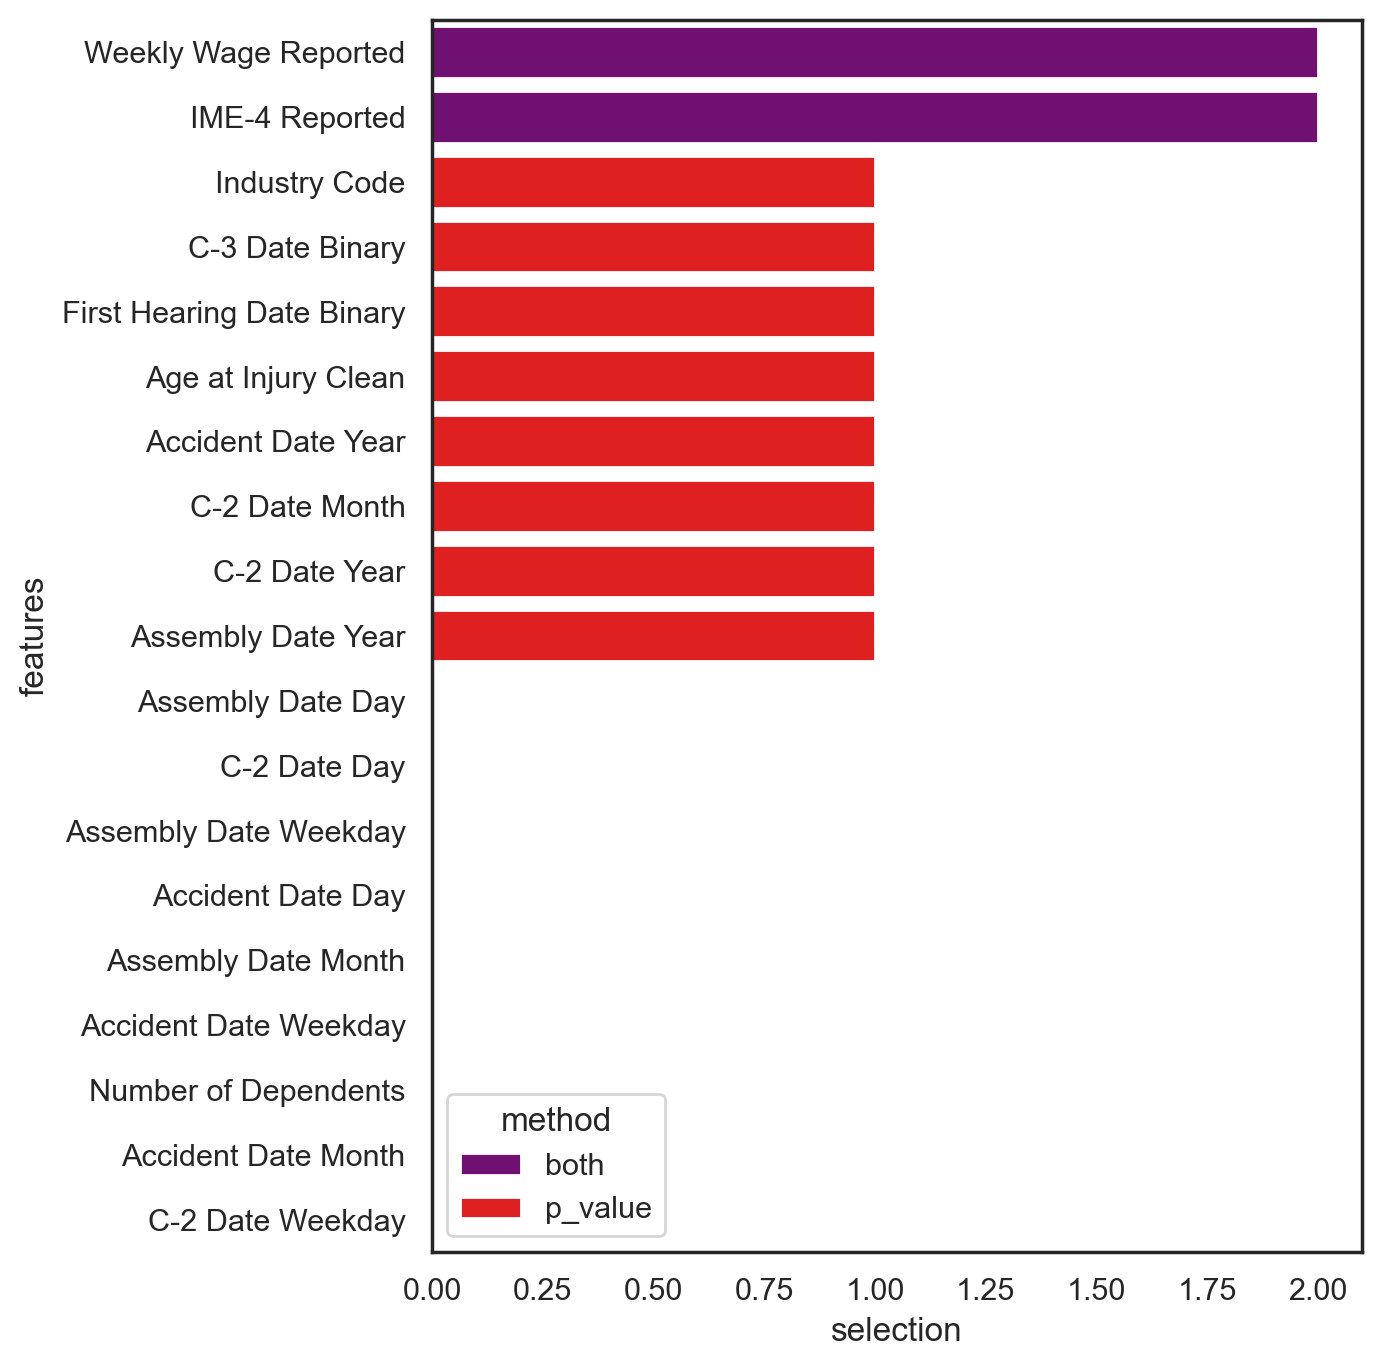

In [87]:
#### advanced feature selection
## 1. using Linear Regression - compare simple linear regressions and compare p-value (Anova)
## 2. using Ridge Regularization

# Split data
X = X_train.select_dtypes(include=["number"]).values
y = y_train.values

# Feature names
feature_names = X_train.select_dtypes(include=["number"]).columns

## p-value
selector = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k=10).fit(X,y)
pvalue_selected_features = feature_names[selector.get_support()]

## Ridge Regularization
selector = feature_selection.SelectFromModel(estimator= linear_model.Ridge(alpha=1.0, fit_intercept=True), max_features=19).fit(X,y)
regularization_selected_features = feature_names[selector.get_support()]
 
## plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["p_value"] = dtf_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
dtf_features["regularization"] = dtf_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
dtf_features["method"] = dtf_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
dtf_features["method"] = dtf_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)

# plot
plt.figure(figsize=(6, 8))
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False,
            palette={"p_value":"red", "regularization":"blue", "both":"purple"});

## the red bars - variables selected by both methods (Anova and Ridge)
## blue bars - feature selected only by the first methid (Anova)

---

# 💾 Save Data 

In [144]:
# Save the training and validation sets
X_train.to_parquet('data/2ndNotebook/X_train.parquet', index=False, engine='fastparquet')
X_val.to_parquet('data/2ndNotebook/X_val.parquet', index=False, engine='fastparquet')
y_train.to_frame().to_parquet('data/2ndNotebook/y_train.parquet', index=False, engine='fastparquet')
y_val.to_frame().to_parquet('data/2ndNotebook/y_val.parquet', index=False, engine='fastparquet')

# Save the test set
test_data.to_parquet('data/2ndNotebook/test_data.parquet', index=False, engine='fastparquet')

---

# 🔗 Bibliography/References

**[[1]](https://kaggle.com/code/willkoehrsen/introduction-to-manual-feature-engineering)** Koehrsten, Will. (2022), "Introduction to Manual Feature Engineering." https://kaggle.com/code/willkoehrsen/introduction-to-manual-feature-engineering

**[[2]](https://towardsdatascience.com/feature-engineering-for-machine-learning-a80d3cdfede6)** Poon, Wing. (2022), "Feature Engineering for Machine Learning (1/3)." Medium. https://towardsdatascience.com/feature-engineering-for-machine-learning-a80d3cdfede6

**[3]** XXXXXXXXXXX

**[4]** XXXXXXXXXXX